<a href="https://colab.research.google.com/github/nadnik13/sparse_grid/blob/main/GPU_Simple_Cycle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import math
import sys
from numba import cuda

In [36]:
grid_a = np.random.sample(297)
grid_b = np.random.sample(297)*3

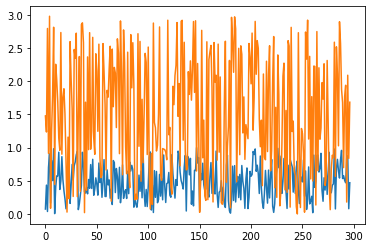

In [37]:
plt.plot(grid_a)
plt.plot(grid_b)
plt.show()

In [155]:
from numba import cuda # Библиотека Nvidia для работы с GPU 
import numpy as np 


@cuda.jit('float64(float64)', device=True)
def phi_1(x):
    if -1 <= x <= 1:
        return 1 - abs(x)
    return 0

@cuda.jit('void(float64[:], float64[:], float64[:])') #Динамический компилятор Cuda 
def cuda_addition(d_a,d_b,d_c):
    """Поток будет выполнять эту функцию ядра."""
    i = cuda.blockIdx.x * cuda.blockDim.x + cuda.threadIdx.x # Отображение потока на индекс массива
    if (i >= c.size):
      return
    d_c[i] = phi_1(3) #Perform the addition
 
# Подробности об устройстве
device = cuda.get_current_device()
n = 297
# Перенос с хоста на устройство
d_a = cuda.to_device(grid_a)  # Перенос данных в глобальную память GPU
d_b = cuda.to_device(grid_b)  # Перенос данных в глобальную память GPU
d_c = cuda.device_array_like(grid_a)

tpb = device.WARP_SIZE       #blocksize или количество потоков на блок, стандартное значение = 32
bpg = int(np.ceil((n)/tpb))  # блоков на грид

cuda_addition[bpg, tpb](d_a, d_b, d_c) # вызов ядра

# Перенос вывода с устройства на хост
c = d_c.copy_to_host()

[0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96
 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96
 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96
 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96
 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96
 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96
 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96
 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96
 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96
 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96
 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96
 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96
 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96
 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96 0.96
 0.96 

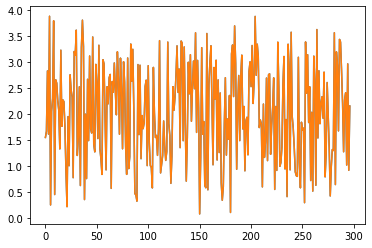

In [43]:
plt.plot(c)
plt.plot(grid_a + grid_b)
plt.show()

d = 1 пробуем реализовать

In [2]:
@cuda.jit('float64(float64)', device=True)
def fun_gpu(x):
    return math.sin(10 * x - 0.1)

In [3]:
def fun_cpu(x):
    return math.sin(10 * x - 0.1)

In [4]:
@cuda.jit('float64(int32, int32)', device=True)
def xli_gpu(l, i):
    return i * (2. ** (-l))

In [5]:
def xli_cpu(l, i):
    return i * (2. ** (-l))

In [6]:
@cuda.jit('float64(float64)', device=True)
def phi_1_gpu(x):
    if -1 <= x <= 1:
        return 1 - abs(x)
    return 0
@cuda.jit('float64(float64)', device=True)
def phi_2_gpu(x):
    if -1 <= x <= 1:
        return - (x-1)*(x+1)
    return 0

@cuda.jit('float64(int32, int32, float64)', device=True)
def phi_li_gpu(l, i, x):
    if l == 0:
        return phi_1_gpu(x * 2. ** l - i)
    else:
        return phi_2_gpu(x * 2. ** l - i)

In [7]:
def add_a(e):
    e['a'] = fun_cpu(xli_cpu(e['l'], e['i']))
#     print(f"add_a: i={e['i']} l={e['l']} e['i'] // 4={e['i'] % 4} e['i'] // 3={e['i'] % 3}")
    if e['l'] == 1:
        e['a'] += -0.5 * (fun_cpu(xli_cpu(e['l'], e['i']- 1)) + fun_cpu(xli_cpu(e['l'], e['i'] + 1)))
    elif (e['i'] % 4 == 1 and e['l'] > 1):
        e['a'] += -0.125 * (3*fun_cpu(xli_cpu(e['l'], e['i'] - 1)) + 6*fun_cpu(xli_cpu(e['l'], e['i'] + 1)) - fun_cpu(xli_cpu(e['l'], e['i'] + 3)))
    elif (e['i'] % 4 == 3 and e['l'] > 1):
        e['a'] += -0.125 * (3*fun_cpu(xli_cpu(e['l'], e['i'] + 1)) + 6*fun_cpu(xli_cpu(e['l'], e['i'] - 1)) - fun_cpu(xli_cpu(e['l'], e['i'] - 3)))
#     print(f"a = {e['a']}")
    # print(f"e['l']={e['l']} e['i']={e['i']} a_recursion={e['a']}")
    return e

In [8]:
def buildGrid(grid_level, type):
    grid=[]
    grid = [add_a({'l': 1, 'i': 1})]
    for e in grid:
      if e['l'] == grid_level: #or abs(e['a']) < 1e-3:
          continue
      grid.append(add_a({'l': e['l'] + 1, 'i': 2 * e['i'] - 1}))
      grid.append(add_a({'l': e['l'] + 1, 'i': 2 * e['i'] + 1}))

    grid.append(add_a({'l': 0, 'i': 0}))
    grid.append(add_a({'l': 0, 'i': 1}))
        
    return grid.copy()

In [41]:
fdim = 1
n_points = 100

In [18]:
def prepareGrid(grid, fdim):
  grid_l = []
  grid_i = []
  grid_a = []

  for i in grid:
    grid_l.append(i['l'])
    grid_i.append(i['i'])
    grid_a.append(i['a'])
  
  grid_l = np.array(grid_l)
  grid_i = np.array(grid_i)
  grid_a = np.array(grid_a)

  if fdim > 1:
    grid_l = grid_l.reshape(-1,fdim)
    grid_i = grid_i.reshape(-1,fdim)
    grid_a = grid_a.reshape(-1,fdim)
  return grid_l, grid_i, grid_a


In [19]:
grid = buildGrid(4, 'full')
grid

[{'a': -0.7037679574132577, 'i': 1, 'l': 1},
 {'a': 1.3925481845400456, 'i': 1, 'l': 2},
 {'a': 1.794644338364768, 'i': 3, 'l': 2},
 {'a': 0.32079750951167685, 'i': 1, 'l': 3},
 {'a': -0.6374434814157914, 'i': 3, 'l': 3},
 {'a': -0.49559523769902736, 'i': 5, 'l': 3},
 {'a': 0.07429574033165176, 'i': 7, 'l': 3},
 {'a': -0.06148952171013844, 'i': 1, 'l': 4},
 {'a': 0.02887195507436935, 'i': 3, 'l': 4},
 {'a': 0.10531339317111144, 'i': 5, 'l': 4},
 {'a': -0.08791810042390014, 'i': 7, 'l': 4},
 {'a': -0.10725278343110134, 'i': 9, 'l': 4},
 {'a': 0.11199809461687382, 'i': 11, 'l': 4},
 {'a': 0.06653637221981834, 'i': 13, 'l': 4},
 {'a': -0.09153501648755985, 'i': 15, 'l': 4},
 {'a': -0.09983341664682815, 'i': 0, 'l': 0},
 {'a': -0.45753589377532133, 'i': 1, 'l': 0}]

In [20]:
grid_l, grid_i, grid_a = prepareGrid(grid,1)
grid_l, grid_i, grid_a

(array([1, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 0, 0]),
 array([ 1,  1,  3,  1,  3,  5,  7,  1,  3,  5,  7,  9, 11, 13, 15,  0,  1]),
 array([-0.70376796,  1.39254818,  1.79464434,  0.32079751, -0.63744348,
        -0.49559524,  0.07429574, -0.06148952,  0.02887196,  0.10531339,
        -0.0879181 , -0.10725278,  0.11199809,  0.06653637, -0.09153502,
        -0.09983342, -0.45753589]))

In [34]:
@cuda.jit('void(int32[:], int32[:], float64[:], float64[:, :], float64[:])')
def eval_gpu(grid_l, grid_i, grid_a, r, x):
    i = cuda.blockIdx.x * cuda.blockDim.x + cuda.threadIdx.x # Отображение потока на индекс массива
    j = cuda.blockIdx.y * cuda.blockDim.y + cuda.threadIdx.y # Отображение потока на индекс массива
    if (i >= r.size):
      return
    r[i][j] = grid_a[i] * phi_li_gpu(grid_l[i], grid_i[i], x[j])


In [49]:
from numba import cuda # Библиотека Nvidia для работы с GPU 
import numpy as np 

x = np.linspace(0., 1., num=100)
# Подробности об устройстве
device = cuda.get_current_device()
n = [n_points, grid_a.size,]

# Перенос с хоста на устройство
d_grid_l = cuda.to_device(grid_l)  # Перенос данных в глобальную память GPU
d_grid_i = cuda.to_device(grid_i)  # Перенос данных в глобальную память GPU
d_grid_a = cuda.to_device(grid_a)  # Перенос данных в глобальную память GPU
d_r = cuda.device_array_like(np.zeros(n))

tpb = (device.WARP_SIZE, device.WARP_SIZE)  #blocksize или количество потоков на блок, стандартное значение = 32
bpg = (int(np.ceil((n[0])/tpb[0])), int(np.ceil((n[1])/tpb[1])) )  # блоков на грид


eval_gpu[bpg, tpb](d_grid_l, d_grid_i, d_grid_a, d_r, x) # вызов ядра

# Перенос вывода с устройства на хост
r = d_r.copy_to_host()

print(sum(r))

CudaAPIError: ignored